#Derie Dariant
#Proyek Akhir : Image Classification Model Deployment

###Library

In [1]:
!pip install -q kaggle
!pip install split-folders

In [2]:
#install library
import os
import cv2
import shutil
import numpy as np
import tensorflow as tf
import splitfolders
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from google.colab.patches import cv2_imshow

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dariant","key":"14e3e4759cab7a3bf3e8784c244bd240"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


###Dataset

In [5]:
#download dataset from kaggle
!kaggle datasets download -d tongpython/cat-and-dog
!kaggle datasets download -d phucthaiv02/butterfly-image-classification
!unzip /content/cat-and-dog.zip -d dog_cat
!unzip /content/butterfly-image-classification.zip -d butterfly

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: butterfly/train/Image_2348.jpg  
  inflating: butterfly/train/Image_2349.jpg  
  inflating: butterfly/train/Image_235.jpg  
  inflating: butterfly/train/Image_2350.jpg  
  inflating: butterfly/train/Image_2351.jpg  
  inflating: butterfly/train/Image_2352.jpg  
  inflating: butterfly/train/Image_2353.jpg  
  inflating: butterfly/train/Image_2354.jpg  
  inflating: butterfly/train/Image_2355.jpg  
  inflating: butterfly/train/Image_2356.jpg  
  inflating: butterfly/train/Image_2357.jpg  
  inflating: butterfly/train/Image_2358.jpg  
  inflating: butterfly/train/Image_2359.jpg  
  inflating: butterfly/train/Image_236.jpg  
  inflating: butterfly/train/Image_2360.jpg  
  inflating: butterfly/train/Image_2361.jpg  
  inflating: butterfly/train/Image_2362.jpg  
  inflating: butterfly/train/Image_2363.jpg  
  inflating: butterfly/train/Image_2364.jpg  
  inflating: butterfly/train/Image_2365.jpg  
  inflating: butterfly/

In [6]:
#create dataset folder
!mkdir animals
!mv '/content/butterfly/train' '/content/animals'
!mv '/content/dog_cat/training_set/training_set/cats' '/content/animals'
!mv '/content/dog_cat/training_set/training_set/dogs' '/content/animals'
os.rename ('/content/animals/train', '/content/animals/butterflies')
!ls '/content/animals'

butterflies  cats  dogs


###Image resolution test

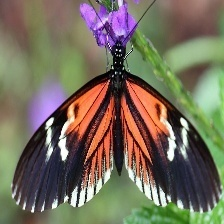

(224, 224, 3)


In [7]:
#image resolution test 1
img1 = cv2.imread('/content/animals/butterflies/Image_10.jpg')
cv2_imshow(img1)
print (img1.shape)

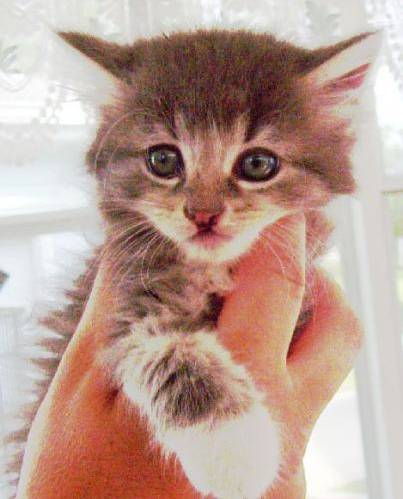

(499, 403, 3)


In [8]:
#image resolution test 2
img2 = cv2.imread('/content/animals/cats/cat.100.jpg')
cv2_imshow(img2)
print (img2.shape)

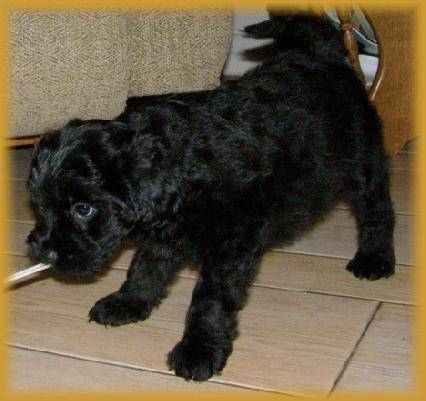

(401, 426, 3)


In [9]:
#image resolution test 3
img3 = cv2.imread('/content/animals/dogs/dog.1020.jpg')
cv2_imshow(img3)
print (img3.shape)

###Create model

In [10]:
#Divide data into train data & validation data
base_dir= '/content/animals'
splitfolders.ratio(base_dir, output='/content/animals', seed=1337, ratio=(0.8, 0.2))
train_dir= os.path.join(base_dir,'train')
validation_dir= os.path.join(base_dir,'val')

Copying files: 14506 files [00:02, 5365.80 files/s]


In [11]:
os.listdir('/content/animals/train')


['butterflies', 'cats', 'dogs']

In [12]:
os.listdir('/content/animals/val')

['butterflies', 'cats', 'dogs']

In [13]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen= ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=128,
    class_mode='categorical'
)

Found 11603 images belonging to 3 classes.
Found 2901 images belonging to 3 classes.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])
base_learning_rate = 0.0001
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

#membuat Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy')>0.92):
      print("\n Akurasi telah mencapai 92%)")
      self.model.stop_training = True

callbacks = myCallback()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 256)       0

###Output model

In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=75,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2, batch_size=1200,  callbacks=[callbacks])

Epoch 1/50
75/75 - 88s - loss: 0.8967 - accuracy: 0.5765 - val_loss: 0.6995 - val_accuracy: 0.6609 - 88s/epoch - 1s/step
Epoch 2/50
75/75 - 73s - loss: 0.6984 - accuracy: 0.6602 - val_loss: 0.6291 - val_accuracy: 0.6969 - 73s/epoch - 968ms/step
Epoch 3/50
75/75 - 73s - loss: 0.6423 - accuracy: 0.6863 - val_loss: 0.5337 - val_accuracy: 0.7484 - 73s/epoch - 974ms/step
Epoch 4/50
75/75 - 75s - loss: 0.5838 - accuracy: 0.7207 - val_loss: 0.5365 - val_accuracy: 0.7531 - 75s/epoch - 996ms/step
Epoch 5/50
75/75 - 74s - loss: 0.5327 - accuracy: 0.7489 - val_loss: 0.5124 - val_accuracy: 0.7531 - 74s/epoch - 985ms/step
Epoch 6/50
75/75 - 72s - loss: 0.4937 - accuracy: 0.7686 - val_loss: 0.4176 - val_accuracy: 0.8156 - 72s/epoch - 961ms/step
Epoch 7/50
75/75 - 71s - loss: 0.4557 - accuracy: 0.7937 - val_loss: 0.4014 - val_accuracy: 0.8234 - 71s/epoch - 952ms/step
Epoch 8/50
75/75 - 70s - loss: 0.4459 - accuracy: 0.7965 - val_loss: 0.3783 - val_accuracy: 0.8328 - 70s/epoch - 937ms/step
Epoch 9/50


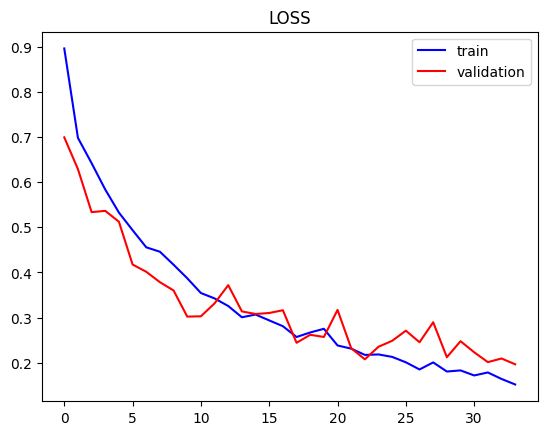

In [16]:
#plot loss
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
plt.title('LOSS')
plt.legend(['train','validation'], loc='upper right')
plt.show()

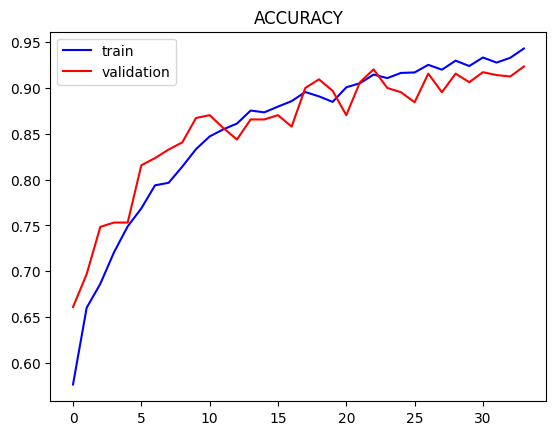

In [17]:
#plot accuracy
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('ACCURACY')
plt.legend(['train', 'validation'], loc= 'upper left')
plt.show()

###Model prediction test

Saving dog.57.jpg to dog.57 (2).jpg
1/1 [==============================] - 0s 19ms/step
Dog


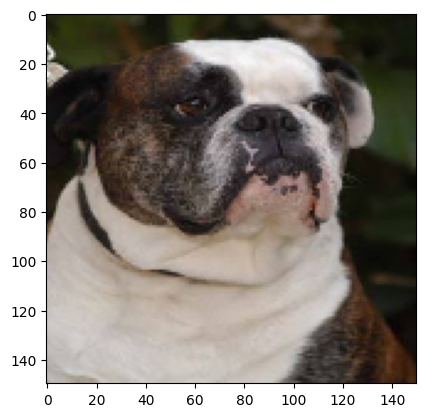

In [29]:
%matplotlib inline
upload = files.upload()

for fn in upload.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=64)

  if classes [0,0]!=0:
    print ('Butterfly')

  elif classes [0,1]!=0:
    print ('Cat')
  else:
    print ('Dog')


Saving cat.1014.jpg to cat.1014.jpg
1/1 [==============================] - 0s 18ms/step
Cat


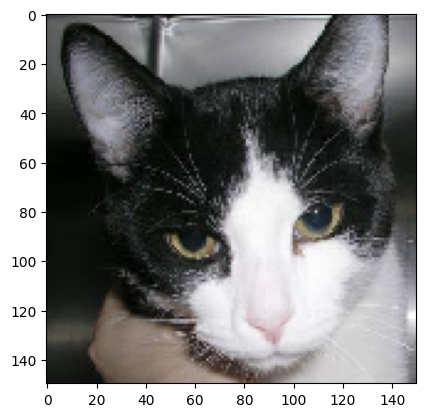

In [28]:
%matplotlib inline
upload = files.upload()

for fn in upload.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=64)

  if classes [0,0]!=0:
    print ('Butterfly')

  elif classes [0,1]!=0:
    print ('Cat')
  else:
    print ('Dog')


Saving Butterfly.jpg to Butterfly (1).jpg
1/1 [==============================] - 0s 18ms/step
Butterfly


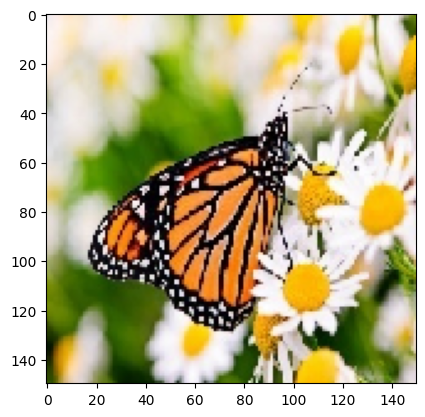

In [22]:
%matplotlib inline
upload = files.upload()

for fn in upload.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=64)

  if classes [0,0]!=0:
    print ('Butterfly')
  elif classes [0,1]!=0:
    print ('Dog')
  else:
    print ('Cat')


###Saving model to the tf-lite

In [32]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs_tflite')
tflite_model_file.write_bytes(tflite_model)

57597084